<div style="text-align: center;"><div  style="color:#7f0000; font-size:30px; font-weight:bold; line-height:40px;">Multiple Linear Regression (Sales Price Prediction)</div></div>
<div style="text-align: center; color:#006666"><strong>Owner: </strong>Mohit Kumar</div>
<div style="text-align: center; color:#006666"><strong>Mail ID: </strong>mohitujjain71195@gmail.com</div>
<div style="text-align: center; color:#006666"><strong>Linkedin ID: </strong>https://www.linkedin.com/in/mohit-kumar-61bb20198</div>
<div style="text-align: center; color:#006666"><strong>Github ID: </strong> https://github.com/Mohitujjain</div>                                                                                                                                 

# Objective

  * Identify the Which Platform have more impact on Sales
  
  * To build the Model which will help to Predict the future sales based on Money invest in Different Platform

In [1]:
import pandas as pd
import numpy as np
import statsmodels
from statsmodels.stats.anova import anova_lm
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Import

In [3]:
new = pd.read_csv(r"E:\Data Science\Irfaan Lec\Statistics\ProbabilityDist\Linear Regression\Advertising_Data.csv")

In [4]:
new.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
new.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
 # Let's Look at some statistical information about our dataframe.

new.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

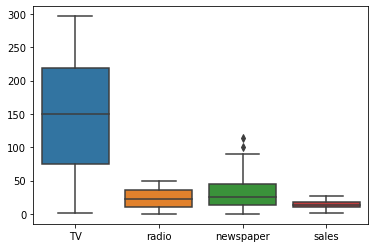

In [7]:
sns.boxplot( data=new)

# Winsorizing Technique -- Treatment of Outlier

In [8]:
q1 = new['newspaper'].quantile(0.25)
q3 = new['newspaper'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
low_limit,upper_limit

(-35.775000000000006, 93.625)

In [9]:
q1,q3,iqr

(12.75, 45.1, 32.35)

In [10]:
new['newspaper']=np.where(new['newspaper'] > upper_limit,upper_limit,new['newspaper']) # upper limit

<AxesSubplot:>

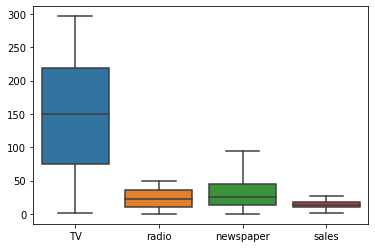

In [11]:
sns.boxplot(data=new)

# Step 3 : Splitting the data in Training and Test set
    
    * Using sklearn we split 70% of our data into training set and rest in test set.
    
    * Setting random_state will give the same training and test set everytime on running the code

In [13]:
# Putting feature variable to X
X = new.drop('sales',axis=1)

# Putting response variable to y
y = new['sales']

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=141)

In [14]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,sales,TV,radio,newspaper
170,8.4,50.0,11.6,18.4
19,14.6,147.3,23.9,19.1
196,9.7,94.2,4.9,8.1
120,15.5,141.3,26.8,46.2
139,20.7,184.9,43.9,1.7


# Correlation Matrix

In [15]:
df.corr()

,sales,TV,radio,newspaper
sales,1.000000,0.769900,0.548585,0.198629
TV,0.769900,1.000000,0.006818,-0.009287
radio,0.548585,0.006818,1.000000,0.362397
newspaper,0.198629,-0.009287,0.362397,1.000000


<AxesSubplot:>

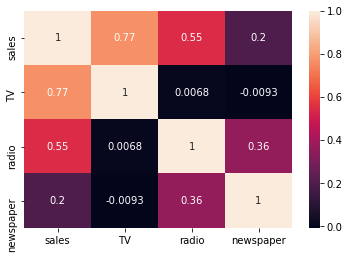

In [16]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'sales vs TV'}, xlabel='TV', ylabel='sales'>

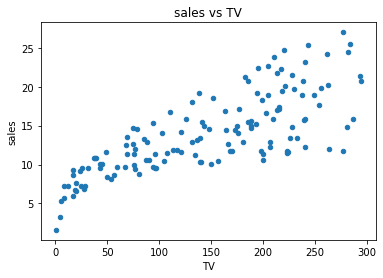

In [17]:
df.plot.scatter(x='TV', y='sales', title='sales vs TV')

# TV have 76% strong positive correlation with Sales

   * TV have high impact on Sales

# Multicolinearity (with the help of VIF)

In [18]:
X1=df.drop(['sales'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i)
                          for i in range(X1.shape[1])],
                         index=X1.columns)
series_before

TV           2.385916
radio        3.314849
newspaper    3.143254
dtype: float64

### No multi-collinearity in the data

In [23]:
#X1.columns

In [24]:
#X1.shape[1]

# Model Building


### Hypothesis Testing


   * HO :- There is no linear relationship between sales and tv, radio & newspaper
   
   * Vs
   
   * H1 :- There is linear relationship between sales and tv, radio & newspaper
   
 ### Alpha  = 5%(0.05)

In [25]:
import statsmodels.formula.api as smf
model = smf.ols('sales ~ TV+ radio+newspaper', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     359.7
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.89e-64
Time:                        15:17:08   Log-Likelihood:                -270.88
No. Observations:                 140   AIC:                             549.8
Df Residuals:                     136   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9005      0.392      7.407      0.000       2.126       3.675
TV             0.0466      0.002     26.708      0.000       0.043       0.050
radio          0.1799      0.010     17.531      0.000       0.160       0.200
newspaper      0.0024      0.007      0.330      0.742      -0.012       0.017
==============================================================================
Omnibus:                       50.961   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.965
Skew:                          -1.429   Prob(JB):                     2.45e-31
Kurtosis:                       6.999   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### There is  linear relationship between sales and tv, radio .

#### There is no  linear relationship between sales and newspaper.

   #### So we will remove and re-run the model
   
#### 88% is accuracy of model, so we say model is good fit

In [26]:
# removing the insignificant variable
model2=smf.ols('sales ~ TV + radio', data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     543.0
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           7.56e-66
Time:                        15:24:37   Log-Likelihood:                -270.94
No. Observations:                 140   AIC:                             547.9
Df Residuals:                     137   BIC:                             556.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9474      0.364      8.104      0.000       2.228       3.667
TV             0.0466      0.002     26.793      0.000       0.043       0.050
radio          0.1811      0.010     19.001      0.000       0.162       0.200
==============================================================================
Omnibus:                       51.833   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.143
Skew:                          -1.444   Prob(JB):                     1.12e-32
Kurtosis:                       7.110   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### There is Significane relationship between sales and tv, radio

#### 88% is acccuracy of model, so we say model is good fit

#### Y = 2.9474 + 0.0466*TV + 0.1811*Radio

In [27]:
X1=df.loc[:,['TV', 'radio']]
series_before = pd.Series([variance_inflation_factor(X1.values, i)
                          for i in range(X1.shape[1])], index=X1.columns)

series_before

TV       2.156378
radio    2.156378
dtype: float64

# Assumption of model

   * Linearity
   * Homoscedasicity
   * Normality
   * Model Error has to be independently identically Distributed

In [28]:
Y = 2.9474 + 0.0466 * 241.7 + 0.1811 * 38
Y

21.09242

In [29]:
df['fitted_value']=model2.fittedvalues #predicted value
df['residual']=model2.resid  #Error
df.head()

,sales,TV,radio,newspaper,fitted_value,residual
170,8.4,50.0,11.6,18.4,7.377125,1.022875
19,14.6,147.3,23.9,19.1,14.136620,0.463380
196,9.7,94.2,4.9,8.1,8.222196,1.477804
120,15.5,141.3,26.8,46.2,14.382428,1.117572
139,20.7,184.9,43.9,1.7,19.510262,1.189738


# Linearity

<AxesSubplot:title={'center':'sales vs TV'}, xlabel='TV', ylabel='sales'>

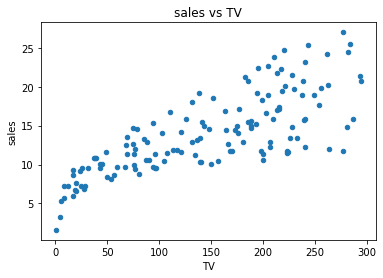

In [32]:
df.plot.scatter(x='TV', y='sales', title='sales vs TV')

# Homoscedasicty

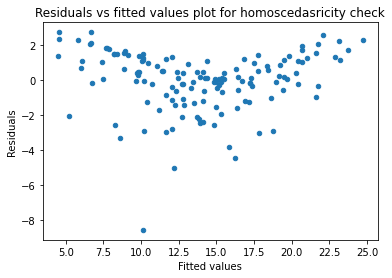

In [33]:
#p = df.plot.scatter(x='fitted_value', y='residual')
#plt.xlabel('Fitted values')
#plt.ylabel('Residuals')
#p = plt.title('Residuals vs fitted values plot for homoscedasricity check')
#plt.show()

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

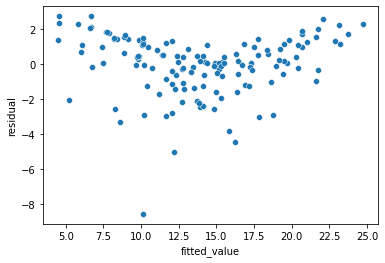

In [35]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

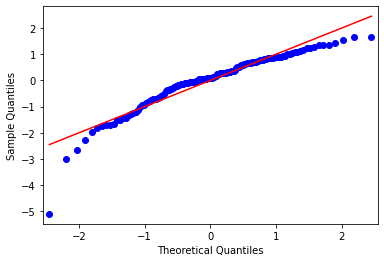

In [37]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s')

# s indicate standardized line
plt.show()

# Model Error are IID

<AxesSubplot:ylabel='Frequency'>

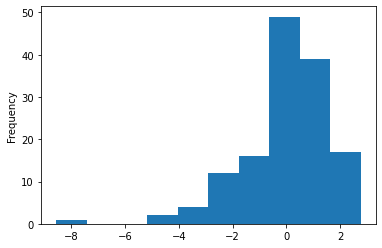

In [38]:
df['residual'].plot.hist()

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


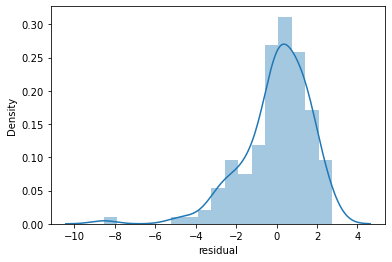

In [39]:
ax = sns.distplot(df.residual)

# Prediction on Test Data (unseen data)

In [40]:
df_test=pd.concat([X_test,y_test], axis=1)

In [41]:
df_test.head()

,TV,radio,newspaper,sales
98,289.7,42.3,51.2,25.4
79,116.0,7.7,23.1,11.0
36,266.9,43.8,5.0,25.4
107,90.4,0.3,23.2,8.7
116,139.2,14.3,25.6,12.2


In [42]:
df_test['Prediction']=model2.predict(df_test)
df_test.head() 

,TV,radio,newspaper,sales,Prediction
98,289.7,42.3,51.2,25.4,24.101467
79,116.0,7.7,23.1,11.0,9.744660
36,266.9,43.8,5.0,25.4,23.311253
107,90.4,0.3,23.2,8.7,7.212051
116,139.2,14.3,25.6,12.2,12.020594


In [43]:
Y = 2.9474 + 0.0466 * 110.7 + 0.1863 * 40.6
Y

15.669800000000002

# Finish

# MSE & MAE & RMSE for evaluation of Model on train data

In [48]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# calculate the mean squared error
model_mse = mean_squared_error(df['sales'],df['fitted_value'])
# calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

print("RMSE {:.3}".format(model_rmse))

RMSE 1.68


# MSE & MAE & RMSE for evaluation of Model on test data

In [49]:
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# calculate the mean squared error
model_mse = mean_squared_error(df['sales'],df['Prediction'])
# calculate the root mean squared error
model_rmse = math.sqrt(model_mse)

print("RMSE {:.3}".format(model_rmse))

KeyError: 'Prediction'